# Imports

In [19]:
from torch.utils.data import DataLoader, random_split
import torch
from data import PermutationDataset
from model import PermutationModel
from train import train_one_epoch, evaluate_model
import matplotlib.pyplot as plt

# Parameters
This includes parameters for what to train on and predict, and also the hyperparameters for training.

In [20]:
n = 5
label_name = "stat8"
layers = [5, 2]
epochs = 3000
train_split, test_split = 0.8, 0.2
learning_rate = 0.001
momentum = 0.9
batch_size = 64

# Initialization
Initialize the data loaders, model, loss function, optimizers.

In [21]:
full_dataset = PermutationDataset(n, label_name)
training_dataset, test_dataset = random_split(full_dataset, [train_split, test_split])
model = PermutationModel(n, layers)
loss_fn = torch.nn.CrossEntropyLoss(full_dataset.class_weights())
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)
training_loader = DataLoader(training_dataset, batch_size=batch_size, shuffle=True)
losses = []

# Training loop
Train the model for the appropriate number of epochs and then save the model in `models`.

In [22]:
for epoch in range(epochs):
    model.train(True)
    current_loss = train_one_epoch(training_loader, model, loss_fn, optimizer)
    print(f"Epoch {epoch}, Loss {current_loss}")
    losses.append(current_loss)

torch.save(model.state_dict(), f"models/{label_name}_{n}.pt")

Epoch 0, Loss 1.3861134052276611
Epoch 1, Loss 1.3855310678482056
Epoch 2, Loss 1.3886920809745789
Epoch 3, Loss 1.3724297881126404
Epoch 4, Loss 1.3901387453079224
Epoch 5, Loss 1.3877270817756653
Epoch 6, Loss 1.3847869038581848
Epoch 7, Loss 1.387734830379486
Epoch 8, Loss 1.3840928077697754
Epoch 9, Loss 1.3834683299064636
Epoch 10, Loss 1.3809442520141602
Epoch 11, Loss 1.3859925866127014
Epoch 12, Loss 1.3844754695892334
Epoch 13, Loss 1.3847718238830566
Epoch 14, Loss 1.3860960602760315
Epoch 15, Loss 1.3877405524253845
Epoch 16, Loss 1.386782169342041
Epoch 17, Loss 1.3846696019172668
Epoch 18, Loss 1.3772379159927368
Epoch 19, Loss 1.3832817673683167
Epoch 20, Loss 1.3793258666992188
Epoch 21, Loss 1.3807294964790344
Epoch 22, Loss 1.3820472955703735
Epoch 23, Loss 1.384373426437378
Epoch 24, Loss 1.3849072456359863
Epoch 25, Loss 1.3843794465065002
Epoch 26, Loss 1.380688190460205
Epoch 27, Loss 1.3822637796401978
Epoch 28, Loss 1.3757165670394897
Epoch 29, Loss 1.38095390796

# Print the loss curve
Visualize the loss curve to ensure that the model is learning correctly. Save the loss curve in `figures/` so that you can refer to them later.

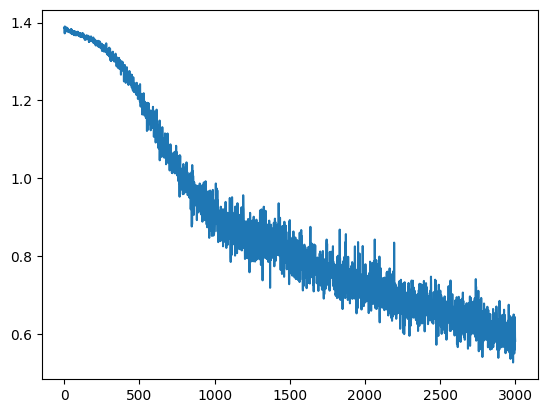

In [23]:
plt.plot(losses)

# Evaluate the model
Compute the confusion matrix on the train and test dataset and print out the accuracy and plot the confusion matrix.

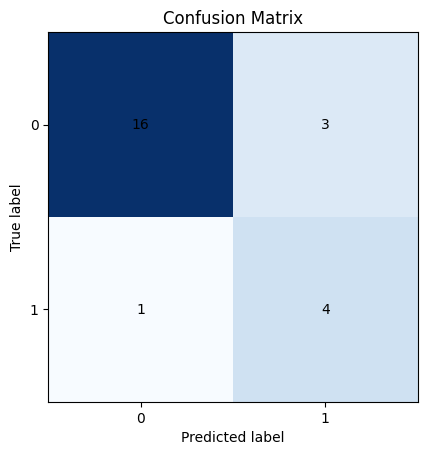

Accuracy for class 0 = 84.21052631578948%
Accuracy for class 1 = 80.0%
Overall accuracy = 83.33333333333333%


In [24]:
confusion_matrix = evaluate_model(model, test_dataset)

confusion_matrix.plot()

confusion_matrix.print_accuracy()

# Plot model weights and connections.
Plot the model weights and connections in order to attempt to interpret what the model is learning.

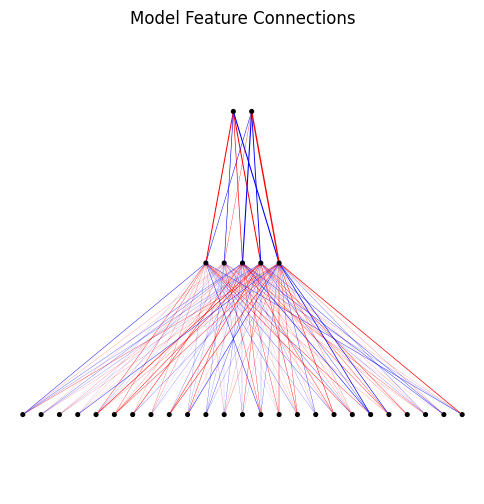

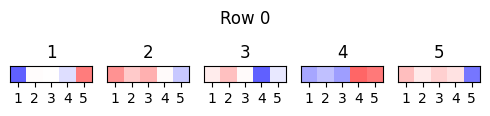

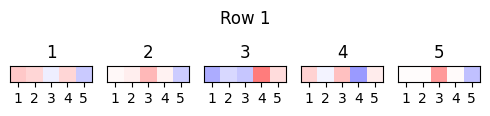

In [25]:
model.plot_connections()
model.plot_heatmap_feature(0,0)
model.plot_heatmap_feature(0,1)